In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets,linear_model,metrics
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
df.shape

(30, 2)

In [6]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
# Identify dependent and independent variable
x = df[['YearsExperience']].values
y = df[['Salary']].values
#x=df.iloc[:, :-1].values
#y=df.iloc[:,1].values

In [11]:
# perform train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.70,random_state=23)

In [12]:
# Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True)
reg.fit(x_train,y_train)

LinearRegression()

In [13]:
# find prediction
y_pred = reg.predict(x_test)
y_pred

array([[ 74153.97405913],
       [ 90099.07367943],
       [ 62898.60962127],
       [ 72278.07998615],
       [ 92912.91478889],
       [ 46953.51000097],
       [107920.0673727 ],
       [ 38511.98667258],
       [ 45077.615928  ]])

In [14]:
y_test

array([[ 66029.],
       [ 91738.],
       [ 63218.],
       [ 67938.],
       [ 98273.],
       [ 39891.],
       [109431.],
       [ 46205.],
       [ 43525.]])

In [21]:
x_pred = reg.predict(x_train)
x_pred.shape

(21, 1)

In [16]:
y_train

array([[116969.],
       [ 83088.],
       [ 81363.],
       [ 39343.],
       [ 61111.],
       [ 56642.],
       [ 55794.],
       [ 37731.],
       [105582.],
       [113812.],
       [122391.],
       [121872.],
       [ 54445.],
       [ 56957.],
       [ 57081.],
       [112635.],
       [101302.],
       [ 57189.],
       [ 64445.],
       [ 60150.],
       [ 93940.]])

Text(0.5, 1.0, 'Trainig data')

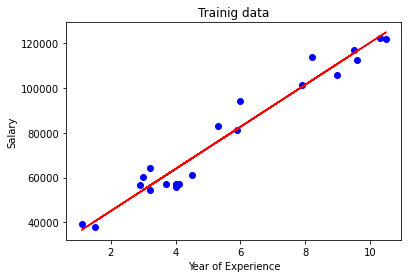

In [17]:
#Visualize training set results
plt.scatter(x_train,y_train,color='blue')

# plot the regression line
plt.plot(x_train,x_pred,color='red')
plt.ylabel("Salary")
plt.xlabel("Year of Experience")
plt.title("Trainig data")

Text(0.5, 1.0, 'Test data')

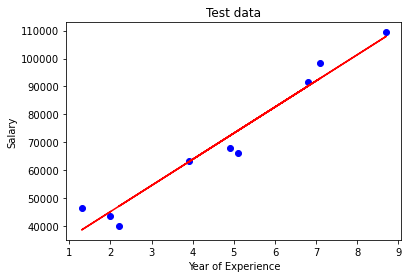

In [18]:
# visualize test set result
plt.scatter(x_test,y_test,color='blue')

#plot regression line
plt.plot(x_test,y_pred,color='red')
plt.ylabel("Salary")
plt.xlabel("Year of Experience")
plt.title("Test data")

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean Square Error ' ,mse)

rmse=np.log(np.sqrt(mse))
print('Root Mean Square Error',rmse)

score = r2_score(y_test, y_pred)
print('Score',score)
# r2 score lies between 0 and 1. IF it is closer to 1 then model is good

Mean Square Error  25569459.567796834
Root Mean Square Error 8.528454605821514
Score 0.9545641710397736


In [20]:
print('Train Score: ', reg.score(x_train, y_train))  
print('Test Score: ', reg.score(x_test, y_test))

Train Score:  0.9561823304126192
Test Score:  0.9545641710397736
